In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-02-05 06:21:06.736451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-05 06:21:06.736526: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
#pooling layer 
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
#final dense layer
outputs = keras.layers.Dense(18, activation = 'softmax')(x)

model = keras.Model(inputs,outputs)
model.compile(loss = "categorical_crossentropy" , metrics = ["accuracy"])


2022-02-05 06:21:14.626277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-05 06:21:14.626318: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-05 06:21:14.626336: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (80dc50edce85): /proc/driver/nvidia/version does not exist
2022-02-05 06:21:14.626568: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
train_generator = ImageDataGenerator(rescale=1/255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    
train_dataset = train_generator.flow_from_directory(batch_size=16,
                                                 directory='FRUIT-16K-1',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = test_generator.flow_from_directory(batch_size=16,
                                                 directory='FRUIT-16K-1',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')


Found 14400 images belonging to 18 classes.
Found 3600 images belonging to 18 classes.


In [7]:
training_history_test = model.fit(train_dataset, batch_size=16, epochs=50, verbose='auto', validation_data=validation_dataset, shuffle=True)

Epoch 1/50
900/900 [==============================] - 1702s 2s/step - loss: 2.1891 - accuracy: 0.3892 - val_loss: 1.7057 - val_accuracy: 0.5528
Epoch 2/50
900/900 [==============================] - 1713s 2s/step - loss: 1.4489 - accuracy: 0.6319 - val_loss: 1.3726 - val_accuracy: 0.5658
Epoch 3/50
900/900 [==============================] - 1892s 2s/step - loss: 1.1809 - accuracy: 0.6894 - val_loss: 1.1432 - val_accuracy: 0.6883
Epoch 4/50
900/900 [==============================] - 1804s 2s/step - loss: 1.0316 - accuracy: 0.7169 - val_loss: 1.0651 - val_accuracy: 0.6569
Epoch 5/50
900/900 [==============================] - 1784s 2s/step - loss: 0.9420 - accuracy: 0.7347 - val_loss: 0.9722 - val_accuracy: 0.7028
Epoch 6/50
900/900 [==============================] - 1801s 2s/step - loss: 0.8661 - accuracy: 0.7456 - val_loss: 0.8823 - val_accuracy: 0.7356
Epoch 7/50
900/900 [==============================] - 1811s 2s/step - loss: 0.8141 - accuracy: 0.7590 - val_loss: 0.8523 - val_accuracy:

In [8]:
model.evaluate(validation_dataset)

225/225 [==============================] - 372s 2s/step - loss: 0.5413 - accuracy: 0.8200


[0.5412901639938354, 0.8199999928474426]

In [10]:
import matplotlib.pyplot as plt

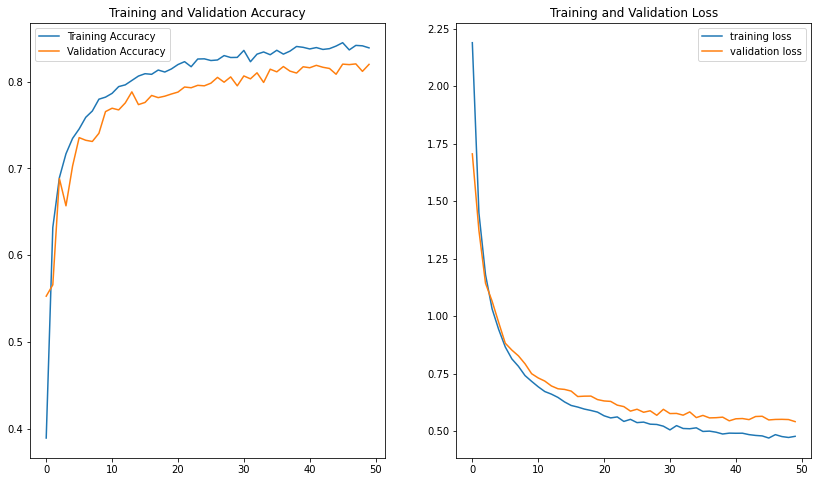

In [11]:

train_acc = training_history_test.history['accuracy']
val_accuracy = training_history_test.history['val_accuracy']

train_loss = training_history_test.history['loss']
val_loss = training_history_test.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, train_loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')

plt.title('Training and Validation Loss')
plt.legend()

In [12]:
import numpy as np
def plot_image1(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
    if predicted_label == true_label: #setting up label color
        color='blue' # correct then blue colour
    else:\
        color='red' # wrong then red colour
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                             100*np.max(predictions_array),
                                             class_names[true_label]),color=color)
    # function to display bar chart showing whether image prediction is how much correct  


In [13]:
class_names = ['Fresh Apple', 'Fresh Banana', 'Fresh Lemon', 'Fresh Lulo', 'Fresh Mango','Fresh Orange', 'Fresh Strawberry', 'Fresh Tamarillo', 'Fresh Tomato','Rotten Apple', 'Rotten Banana', 'Rotten Lemon', 'Rotten Lulo', 'Rotten Mango','Rotten Orange', 'Rotten Strawberry', 'Rotten Tamarillo', 'Rotten Tomato']

In [14]:
X_test, y_test = next(validation_dataset)

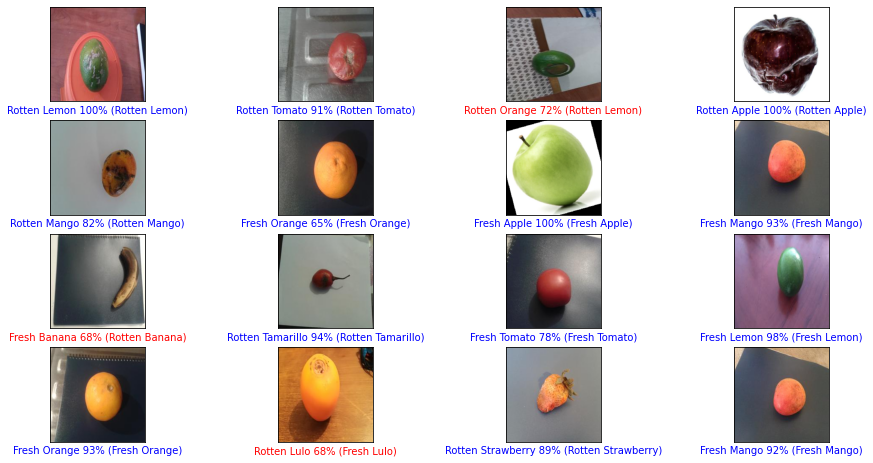

In [16]:
# verification of several images
predictions = model.predict(X_test)
num_rows=4
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image1(i,predictions, y_test, X_test)

plt.show()

In [17]:
import time
ts = int(time.time())
file_path = f"D:/models-ca2-final/dooa/img_classifier/{ts}/"
model.save(filepath=file_path, save_format='tf')
file_path = f"./img_classifier/{ts}/"
model.save(filepath=file_path, save_format='tf')

2022-02-06 12:55:57.997802: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: D:/models-ca2-final/dooa/img_classifier/1644152155/assets
INFO:tensorflow:Assets written to: ./img_classifier/1644152155/assets
